# Telecom Churn Case Study

## Problem Statement

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this case study we need to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. <br> <br>
<b> Modelling required: </b> <br>
- To build a multitude of classification models and select the one model which best predicts customer churn
- To determine which variables are significant indicators of customer churn
- To establish how well those variables predict the churn of a customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting display option to show all columns and values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Please specify the location of the Excel file here

In [4]:
path = r'D:\Maria\Data Science\Data Files'

### Extracting the Telecom Churn data

In [5]:
telecom = pd.read_csv(path + "\\" + 'telecom_churn_data.csv')

In [6]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [7]:
telecom.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14            0.0   
99995        100.83         69.01         66.39         56.13            0.0   
99996         21.04           NaN           NaN           NaN            0.0   
99997          0.00          0.00          0.00          0.00            0.0   
99998        166.46           NaN           NaN           NaN            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994            0.0            0.0           0.00            0.0   
99995            0.0            0.0           0.95            0.0   
99996            NaN            NaN            NaN            0.0   
99997            0.0            0.0           0.00            0.0   
99998            NaN            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994            0.0            0.0           0.00              5.40   
99995            0.0            0.0           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997            0.0            0.0           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       l

### Performing routine checks on the Telecom Churn Data

In [8]:
telecom.shape

(99999, 226)

In [9]:
telecom.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [10]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

## Data Cleaning

#### Checking for duplicate entries

In [11]:
sum(telecom.duplicated())

0

There are no duplicate entries in the dataset.

#### Dropping the mobile_number column

In [12]:
telecom.drop('mobile_number', axis = 1, inplace = True)

### Checking for null values

In [13]:
telecom.isnull().sum(axis = 0)

circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou

We can see that there are quite a lot of null values in the dataset. So we will check the percentage of null values.

In [14]:
round((telecom.isnull().sum(axis = 0)/len(telecom.index)) * 100, 2)

circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou

We can see that there are a few columns with around 75% of missing data. Normally we would drop such columns. 

But here, we will need some of these 'recharge' columns to filter out high-value cutomers. So, we will impute the null values in these columns.

### Imputing the null values in the recharge data columns

Examining the dataset, we can see that 'total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6'  have null values <b> for the same number of records. </b> Also, for these records, 'date_of_last_rech_data_6' is null indicating that no data recharge was done for those customers.<br> <br>
This holds true for the months of July and August as well. <br> <br>
So we will verify if this holds true for all the records. If so, we can conclude that no data recharge was done for that month and the missing values can be imputed with 0 based on the derived feature <b> 'recharged_data_*' </b>

In [15]:
# Comparing total_rech_data_6, max_rech_data_6, av_rech_amt_data_6, count_rech_2g_6, 
# count_rech_3g_6, av_rech_amt_data_6, arpu_3g_6, arpu_2g_6, night_pck_user_6, 
# fb_user_6 and date_of_last_rech_data_6 columns

total_rech_data = telecom['total_rech_data_6'].isnull()
max_rech_data = telecom['max_rech_data_6'].isnull()
av_rech_amt_data = telecom['av_rech_amt_data_6'].isnull()
count_rech_2g = telecom['count_rech_2g_6'].isnull()
count_rech_3g = telecom['count_rech_3g_6'].isnull()
av_rech_amt_data = telecom['av_rech_amt_data_6'].isnull()
arpu_3g = telecom['arpu_3g_6'].isnull()
arpu_2g = telecom['arpu_2g_6'].isnull()
night_pck_user = telecom['night_pck_user_6'].isnull()
fb_user = telecom['fb_user_6'].isnull()
date_rech_data = telecom['date_of_last_rech_data_6'].isnull()

# Verifying that the indices match
if (total_rech_data.equals(date_rech_data)) and (max_rech_data.equals(date_rech_data) and
    av_rech_amt_data.equals(date_rech_data)) and (count_rech_2g.equals(date_rech_data) and
    count_rech_3g.equals(date_rech_data)) and (av_rech_amt_data.equals(date_rech_data) and
    arpu_3g.equals(date_rech_data)) and (arpu_2g.equals(date_rech_data) and
    night_pck_user.equals(date_rech_data)) and (fb_user.equals(date_rech_data)):
    print('Indices matches for the month 6 indicating that null values are present for the same records')

Indices matches for the month 6 indicating that null values are present for the same records


In [16]:
# Comparing total_rech_data_7, max_rech_data_7, av_rech_amt_data_7, count_rech_2g_7, 
# count_rech_3g_7, av_rech_amt_data_7, arpu_3g_7, arpu_2g_7, night_pck_user_7, 
# fb_user_7 and date_of_last_rech_data_7 columns

total_rech_data = telecom['total_rech_data_7'].isnull()
max_rech_data = telecom['max_rech_data_7'].isnull()
av_rech_amt_data = telecom['av_rech_amt_data_7'].isnull()
count_rech_2g = telecom['count_rech_2g_7'].isnull()
count_rech_3g = telecom['count_rech_3g_7'].isnull()
av_rech_amt_data = telecom['av_rech_amt_data_7'].isnull()
arpu_3g = telecom['arpu_3g_7'].isnull()
arpu_2g = telecom['arpu_2g_7'].isnull()
night_pck_user = telecom['night_pck_user_7'].isnull()
fb_user = telecom['fb_user_7'].isnull()
date_rech_data = telecom['date_of_last_rech_data_7'].isnull()

# Verifying that the indices match
if (total_rech_data.equals(date_rech_data)) and (max_rech_data.equals(date_rech_data) and
    av_rech_amt_data.equals(date_rech_data)) and (count_rech_2g.equals(date_rech_data) and
    count_rech_3g.equals(date_rech_data)) and (av_rech_amt_data.equals(date_rech_data) and
    arpu_3g.equals(date_rech_data)) and (arpu_2g.equals(date_rech_data) and
    night_pck_user.equals(date_rech_data)) and (fb_user.equals(date_rech_data)):
    print('Indices matches for the month 7 indicating that null values are present for the same records')

Indices matches for the month 7 indicating that null values are present for the same records


In [17]:
# Comparing total_rech_data_8, max_rech_data_8, av_rech_amt_data_8, count_rech_2g_8, 
# count_rech_3g_8, av_rech_amt_data_8, arpu_3g_8, arpu_2g_8, night_pck_user_8, 
# fb_user_8 and date_of_last_rech_data_8 columns

total_rech_data = telecom['total_rech_data_8'].isnull()
max_rech_data = telecom['max_rech_data_8'].isnull()
av_rech_amt_data = telecom['av_rech_amt_data_8'].isnull()
count_rech_2g = telecom['count_rech_2g_8'].isnull()
count_rech_3g = telecom['count_rech_3g_8'].isnull()
av_rech_amt_data = telecom['av_rech_amt_data_8'].isnull()
arpu_3g = telecom['arpu_3g_8'].isnull()
arpu_2g = telecom['arpu_2g_8'].isnull()
night_pck_user = telecom['night_pck_user_8'].isnull()
fb_user = telecom['fb_user_8'].isnull()
date_rech_data = telecom['date_of_last_rech_data_8'].isnull()

# Verifying that the indices match
if (total_rech_data.equals(date_rech_data)) and (max_rech_data.equals(date_rech_data) and
    av_rech_amt_data.equals(date_rech_data)) and (count_rech_2g.equals(date_rech_data) and
    count_rech_3g.equals(date_rech_data)) and (av_rech_amt_data.equals(date_rech_data) and
    arpu_3g.equals(date_rech_data)) and (arpu_2g.equals(date_rech_data) and
    night_pck_user.equals(date_rech_data)) and (fb_user.equals(date_rech_data)):
    print('Indices matches for the month 8 indicating that null values are present for the same records')

Indices matches for the month 8 indicating that null values are present for the same records


#### Deriving new features from Date of Last Recharge Data columns

We are deriving new columns 'recharged_data_*'  based on 'date_of_last_rech_data_*'
for the months of June, July and August, to show if the user has recharged data for the month or not. <br> <br>
If the date of last recharge data is not null, the flag value will be 'y' (user recharged) or else the flag will be 'n' (user has not recharged). <br> <br>
This will be more useful in our analysis rather than the actual date.

In [18]:
telecom[['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
         'date_of_last_rech_data_8']].head()

date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8
0                6/21/2014                7/16/2014                 8/8/2014
1                      NaN                7/25/2014                8/10/2014
2                      NaN                      NaN                      NaN
3                      NaN                      NaN                      NaN
4                 6/4/2014                      NaN                      NaN

#### Deriving 'recharged_data_*'

In [19]:
# This column is a flag indicating if the user has recharged mobile data for the month or not
new_col = 'recharged_data_'
old_col = 'date_of_last_rech_data_'
for month in ['6','7','8']:
    telecom[new_col + month] = np.where(telecom[old_col + month].isnull(), 'n', 'y')

#### Verifying if the flag for recharge data is updated correctly

In [20]:
flag_cols = ['date_of_last_rech_data_6', 'recharged_data_6', 'date_of_last_rech_data_7', 
             'recharged_data_7', 'date_of_last_rech_data_8', 'recharged_data_8']
telecom[flag_cols].head()

date_of_last_rech_data_6 recharged_data_6 date_of_last_rech_data_7  \
0                6/21/2014                y                7/16/2014   
1                      NaN                n                7/25/2014   
2                      NaN                n                      NaN   
3                      NaN                n                      NaN   
4                 6/4/2014                y                      NaN   

  recharged_data_7 date_of_last_rech_data_8 recharged_data_8  
0                y                 8/8/2014                y  
1                y                8/10/2014                y  
2                n                      NaN                n  
3                n                      NaN                n  
4                n                      NaN                n

#### Dropping the date_of_last_rech_data_* columns

In [21]:
date_cols = ["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"]
telecom.drop(date_cols, axis = 1, inplace = True)

#### Handling the null values in the recharge columns related to mobile data usage

Imputing the following columns based on 'recharged_data_*' . <br><br> If the user has not recharged for that month, the columns related to the usage of mobile data is also observed to be null. 
Hence the following columns are imputed with 0, if the user has not recharged for that month.
- total_rech_data_6 
- max_rech_data_6 
- av_rech_amt_data_6
- count_rech_2g_6
- count_rech_3g_6
- av_rech_amt_data_6
- arpu_3g_6
- arpu_2g_6
- night_pck_user_6
- fb_user_6 <br> <br>
We repeat this imputation for July and August months as well

In [22]:
mask_col = 'recharged_data_'
imp_cols = ['total_rech_data_', 'max_rech_data_', 'av_rech_amt_data_', 
            'count_rech_2g_', 'count_rech_3g_', 'av_rech_amt_data_', 
            'arpu_3g_', 'arpu_2g_', 'night_pck_user_', 'fb_user_']

print('Imputing data related columns for June, July and August with 0')
print('if the user has not recharged for mobile data for that month')
for month in ['6', '7', '8']:
    mask = telecom[mask_col + month] == 'n'
    for col in imp_cols:
        # Imputing with 0 if the indices match        
        telecom.loc[mask, col + month] = telecom.loc[mask, col + month].fillna(0)

Imputing data related columns for June, July and August with 0
if the user has not recharged for mobile data for that month


### Filter high-value customers

A major requirement in our problem statement is that we filter out high-value customers and predict the churn only for those customers. 

High - value customers are defined as follows:
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (Month 6 and Month 7).

For finding the high-value customers we will need the following columns:
- total_rech_data_6
- total_rech_data_7
- av_rech_amt_data_6
- av_rech_amt_data_7
- total_rech_amt_6
- total_rech_amt_7

#### Deriving new features

We will use total_rech_data_* and av_rech_amt_data_* to derive rech_data_amt_* which will be used to filter out high value customers.

In [23]:
telecom['rech_data_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['rech_data_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['rech_data_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

#### Dropping total_rech_data_* and av_rech_amt_data_* columns

In [24]:
cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
telecom.drop(cols, axis = 1, inplace = True)

#### Filtering out the high value customers

In [25]:
# Computing the average amount for the first two months
avg_rec_amt_6 = telecom[['total_rech_amt_6', 'rech_data_amt_6']].sum(axis = 1)
avg_rec_amt_7 = telecom[['total_rech_amt_7', 'rech_data_amt_7']].sum(axis = 1)
avg_rec_amt = (avg_rec_amt_6 + avg_rec_amt_7)/2

# Getting the 70th percentile of the average recharge amount for the first two months
avg_70 = np.percentile(avg_rec_amt, 70)

# Filtering the high value customers
telecom = telecom[avg_rec_amt >= avg_70]

# Checking the shape of the telecom dataset (it should have about 29.9k rows)
telecom.shape

(30001, 222)

We can see that there are around 30K records after filtering out the high-value customers

### Tag churners and remove attributes of the churn phase

We have to tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [26]:
telecom[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0             0.00            0.00         0.00         0.00
7             0.00            0.00         0.00         0.00
8            34.91          142.18         0.00         0.00
21          252.61         1031.53         0.00         0.00
23          127.48          127.63        13.93       314.74

Any customer who has not made any calls (either incoming or outgoing) AND has not used mobile internet even once in the churn phase will have all the above attributes as 0. Such customers can be tagged as churners (churn = 1) else they can be tagged as non-churners (churn = 0).

#### Tagging the churners

In [27]:
telecom['churn'] = telecom.apply(lambda X: 1 if ((X['total_ic_mou_9'] == 0) and 
                                                (X['total_og_mou_9'] == 0) and
                                                (X['vol_2g_mb_9'] == 0) and
                                                (X['vol_3g_mb_9'] == 0)) else 0, axis = 1)
telecom.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0         109             0.0             0.0             0.0   
7         109             0.0             0.0             0.0   
8         109             0.0             0.0             0.0   
21        109             0.0             0.0             0.0   
23        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.

#### Verifying that the churn customers have been updated correctly

In [28]:
telecom[(telecom['total_ic_mou_9'] == 0) & (telecom['total_og_mou_9'] == 0) & 
        (telecom['vol_2g_mb_9'] == 0) & (telecom['vol_3g_mb_9'] == 0)][
        ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
0               0.0             0.0          0.0          0.0      1
7               0.0             0.0          0.0          0.0      1
67              0.0             0.0          0.0          0.0      1
86              0.0             0.0          0.0          0.0      1
111             0.0             0.0          0.0          0.0      1

#### Removing attributes corresponding to the churn phase

Now that we have tagged the churn customers, we can remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’ in their names)

In [29]:
# Finding the columns with '_9' in their names
cols = [col for col in telecom.columns if '_9' in col]

telecom = telecom.drop(cols, axis = 1)

# Deleting 'sep_vbc_3g' which is also a churn phase attribute
telecom = telecom.drop('sep_vbc_3g', axis = 1)

# Checking the shape of the dataset
telecom.shape

(30001, 168)

### Handling null values

#### Handling the null values in MOU (Minutes of Usage) columns

In [30]:
round(telecom['loc_og_t2o_mou'].value_counts()/len(telecom.index) * 100, 2)

0.0    99.25
Name: loc_og_t2o_mou, dtype: float64

In [31]:
round(telecom['std_og_t2o_mou'].value_counts()/len(telecom.index) * 100, 2)

0.0    99.25
Name: std_og_t2o_mou, dtype: float64

In [32]:
round(telecom['loc_ic_t2o_mou'].value_counts()/len(telecom.index) * 100, 2)

0.0    99.25
Name: loc_ic_t2o_mou, dtype: float64

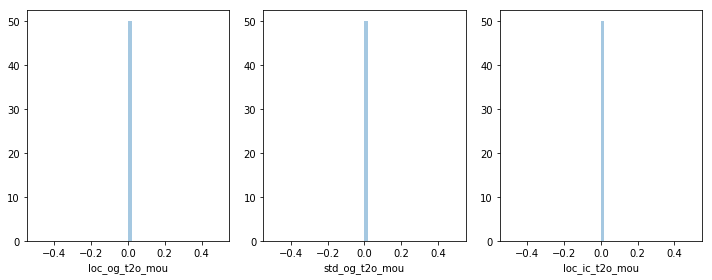

In [33]:
cols = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']

plt.figure(figsize=(10,4))

for i in range(len(cols)):
    plt.subplot(1, 3, i+1)
    sns.distplot(telecom[cols[i]])

plt.tight_layout()
plt.show()

We can see that the loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou columns have almost 0 variance. This amounts to no value addition in prediction. Hence we will drop these columns.

In [34]:
telecom.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis = 1, inplace = True)

#### Handling the null values in MOU (Minutes of Usage) , OG (Outgoing) and IC (Incoming)  for months 6, 7 and 8

In [35]:
round((telecom.isnull().sum(axis = 0)/len(telecom.index)) * 100, 2)

circle_id               0.00
last_date_of_month_6    0.00
last_date_of_month_7    0.09
last_date_of_month_8    0.55
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2f_mou_6        1.82
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2c_mou_6        1.82
loc_og_t2c_mou_7        1.79
loc_og_t2c_mou_8        3.91
loc_og_mou_6            1.82
loc_og_mou_7            1.79
loc_og_mou_8            3.91
std_og_t2t_mou

We can see that for month 6, there are many columns which have the same percentage (1.82%) of missing values. And since this percentage is not very high, we will delete the rows which have null values for those columns. The percentage of rows with missing values for month 7 is 1.79% and for month 8 is 3.91%. Hence we will drop those rows as well.

In [36]:
telecom = telecom[~pd.isnull(telecom['onnet_mou_6'])]
telecom = telecom[~pd.isnull(telecom['onnet_mou_7'])]
telecom = telecom[~pd.isnull(telecom['onnet_mou_8'])]

#### Dropping the date_of_last_rech_* columns

We will drop the date of last recharge columns with the assumption that the date does not contribute much towards our predictive analysis.

In [37]:
date_cols = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]
telecom.drop(date_cols, axis = 1, inplace = True)

In [38]:
round((telecom.isnull().sum(axis = 0)/len(telecom.index)) * 100, 2)

circle_id               0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_mou_6            0.0
loc_og_mou_7            0.0
loc_og_mou_8            0.0
std_og_t2t_mou_6        0.0
std_og_t2t_mou_7    

We can see that all the null values have been removed from the dataset.

### Checking if any columns have unique values

In [39]:
telecom.shape

(28504, 162)

In [40]:
uniques = telecom.apply(lambda x: x.nunique())
uniques[uniques == 1]

circle_id               1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64

The above columns have the same values for all the rows. Since rows with zero variance do not add to the predictive power of the models, we will delete these columns.

In [41]:
telecom = telecom.drop(uniques[uniques == 1].index, axis = 1)
telecom.shape

(28504, 152)

### Removing aggregate coulmns 

There are many columns which are aggregates of other columns: <br> <br>
<b> loc_og_mou_* </b> = loc_og_t2t_mou_* + loc_og_t2m_mou_* + loc_og_t2f_mou_* + loc_og_t2c_mou_* <br> <b> std_og_mou_* </b> = std_og_t2t_mou_* + std_og_t2m_mou_* + std_og_t2f_mou_* + std_og_t2c_mou_* <br>
<b> total_og_mou_* </b> = loc_og_mou_* + std_og_mou_* + isd_og_mou_* + spl_og_mou_* + og_others_* <br>
<b> loc_ic_mou_* </b> = loc_ic_t2t_mou_* + loc_ic_t2m_mou_* + loc_ic_t2f_mou_* + loc_ic_t2c_mou_* <br>
<b> std_ic_mou_* </b> = std_ic_t2t_mou_* + std_ic_t2m_mou_* + std_ic_t2f_mou_* + std_ic_t2o_mou_* <br>
<b> total_ic_mou_* </b> = loc_ic_mou_* + std_ic_mou_* + isd_ic_mou_* + spl_ic_mou_* + ic_others_* <br><br> where * indicates 6, 7 and 8 corresponding to months June, July and August.

We will drop these aggregate columns to eliminate redundancy.

In [42]:
drop_cols = []
agg_cols = ['loc_og_mou_', 'std_og_mou_', 'total_og_mou_', 'loc_ic_mou_', 
            'std_ic_mou_', 'total_ic_mou_']
for i in ['6','7','8']:
    for j in agg_cols:
        drop_cols.append(j+i)
print(drop_cols)
telecom.drop(drop_cols, axis=1, inplace=True)

['loc_og_mou_6', 'std_og_mou_6', 'total_og_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'loc_og_mou_7', 'std_og_mou_7', 'total_og_mou_7', 'loc_ic_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8']


## Data Preparation

### Outliers Analysis

In [43]:
# Getting all the numerical columns
num_cols = list(telecom.dtypes[telecom.dtypes != 'object'].index)

In [44]:
telecom_num = telecom[num_cols]
telecom_num.describe(percentiles = [.05, .25, .5, .75, .95])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  28504.000000  28504.000000  28504.000000  28504.000000  28504.000000   
mean     560.375015    570.628779    526.058843    265.250016    275.933639   
std      448.960314    480.075654    500.754116    458.723036    482.671988   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
5%       122.798500    130.890200     50.718750      0.000000      0.000000   
25%      317.360500    322.602500    254.759000     20.140000     19.530000   
50%      485.169000    488.899500    442.791000     89.985000     89.910000   
75%      698.914000    704.999500    672.453250    298.760000    304.895000   
95%     1232.633400   1268.472050   1267.392650   1135.715000   1206.173000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28504.000000  28504.000000  28504.000000  28504.000000   28504.000000   
mean     244.727998    379.885653    389.853704    350.226224      16.267511   
std      464.022072    479.249454    502.604354    485.648594      75.510149   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
5%         0.000000      3.981500      3.600000      0.960000       0.000000   
25%       14.840000     80.732500     80.352500     60.490000       0.000000   
50%       74.085000    231.550000    231.825000    199.875000       0.000000   
75%      257.415000    494.372500    506.467500    457.432500       0.000000   
95%     1101.550000   1256.088500   1292.275500   1187.343500      86.672500   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   28504.000000   28504.000000   28504.000000   28504.000000   
mean       12.921422      13.032309      26.829239      20.525915   
std        76.897730      75.694636     116.263929      97.519759   
min         0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        57.102500      59.524000     147.427000     107.427000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   28504.000000      28504.000000      28504.000000      28504.000000   
mean       20.751873         87.102282         89.170333         81.991861   
std       107.133222        231.952997        245.383863        232.547042   
min         0.000000          0.000000          0.000000          0.000000   
5%          0.000000          0.000000          0.000000          0.000000   
25%         0.000000          5.330000          5.830000          4.060000   
50%         0.000000         26.220000         26.930000         23.630000   
75%         0.000000         80.995000         82.515000         76.995000   
95%       106.563000        329.960500        333.590000        309.744500   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      28504.000000      28504.000000      28504.000000      28504.000000   
mean         167.766222        169.069169        159.162362          6.550617   
std          251.006834        244.442831        237.033931         22.551190   
min            0.000000          0.000000          0.000000          0.000000   
5%             0.000000          0.000000          0.000000          0.000000   
25%           22.230000         24.605000         18.190000          0.000000   
50%           81.970000         84.370000         75.725000          0.20000

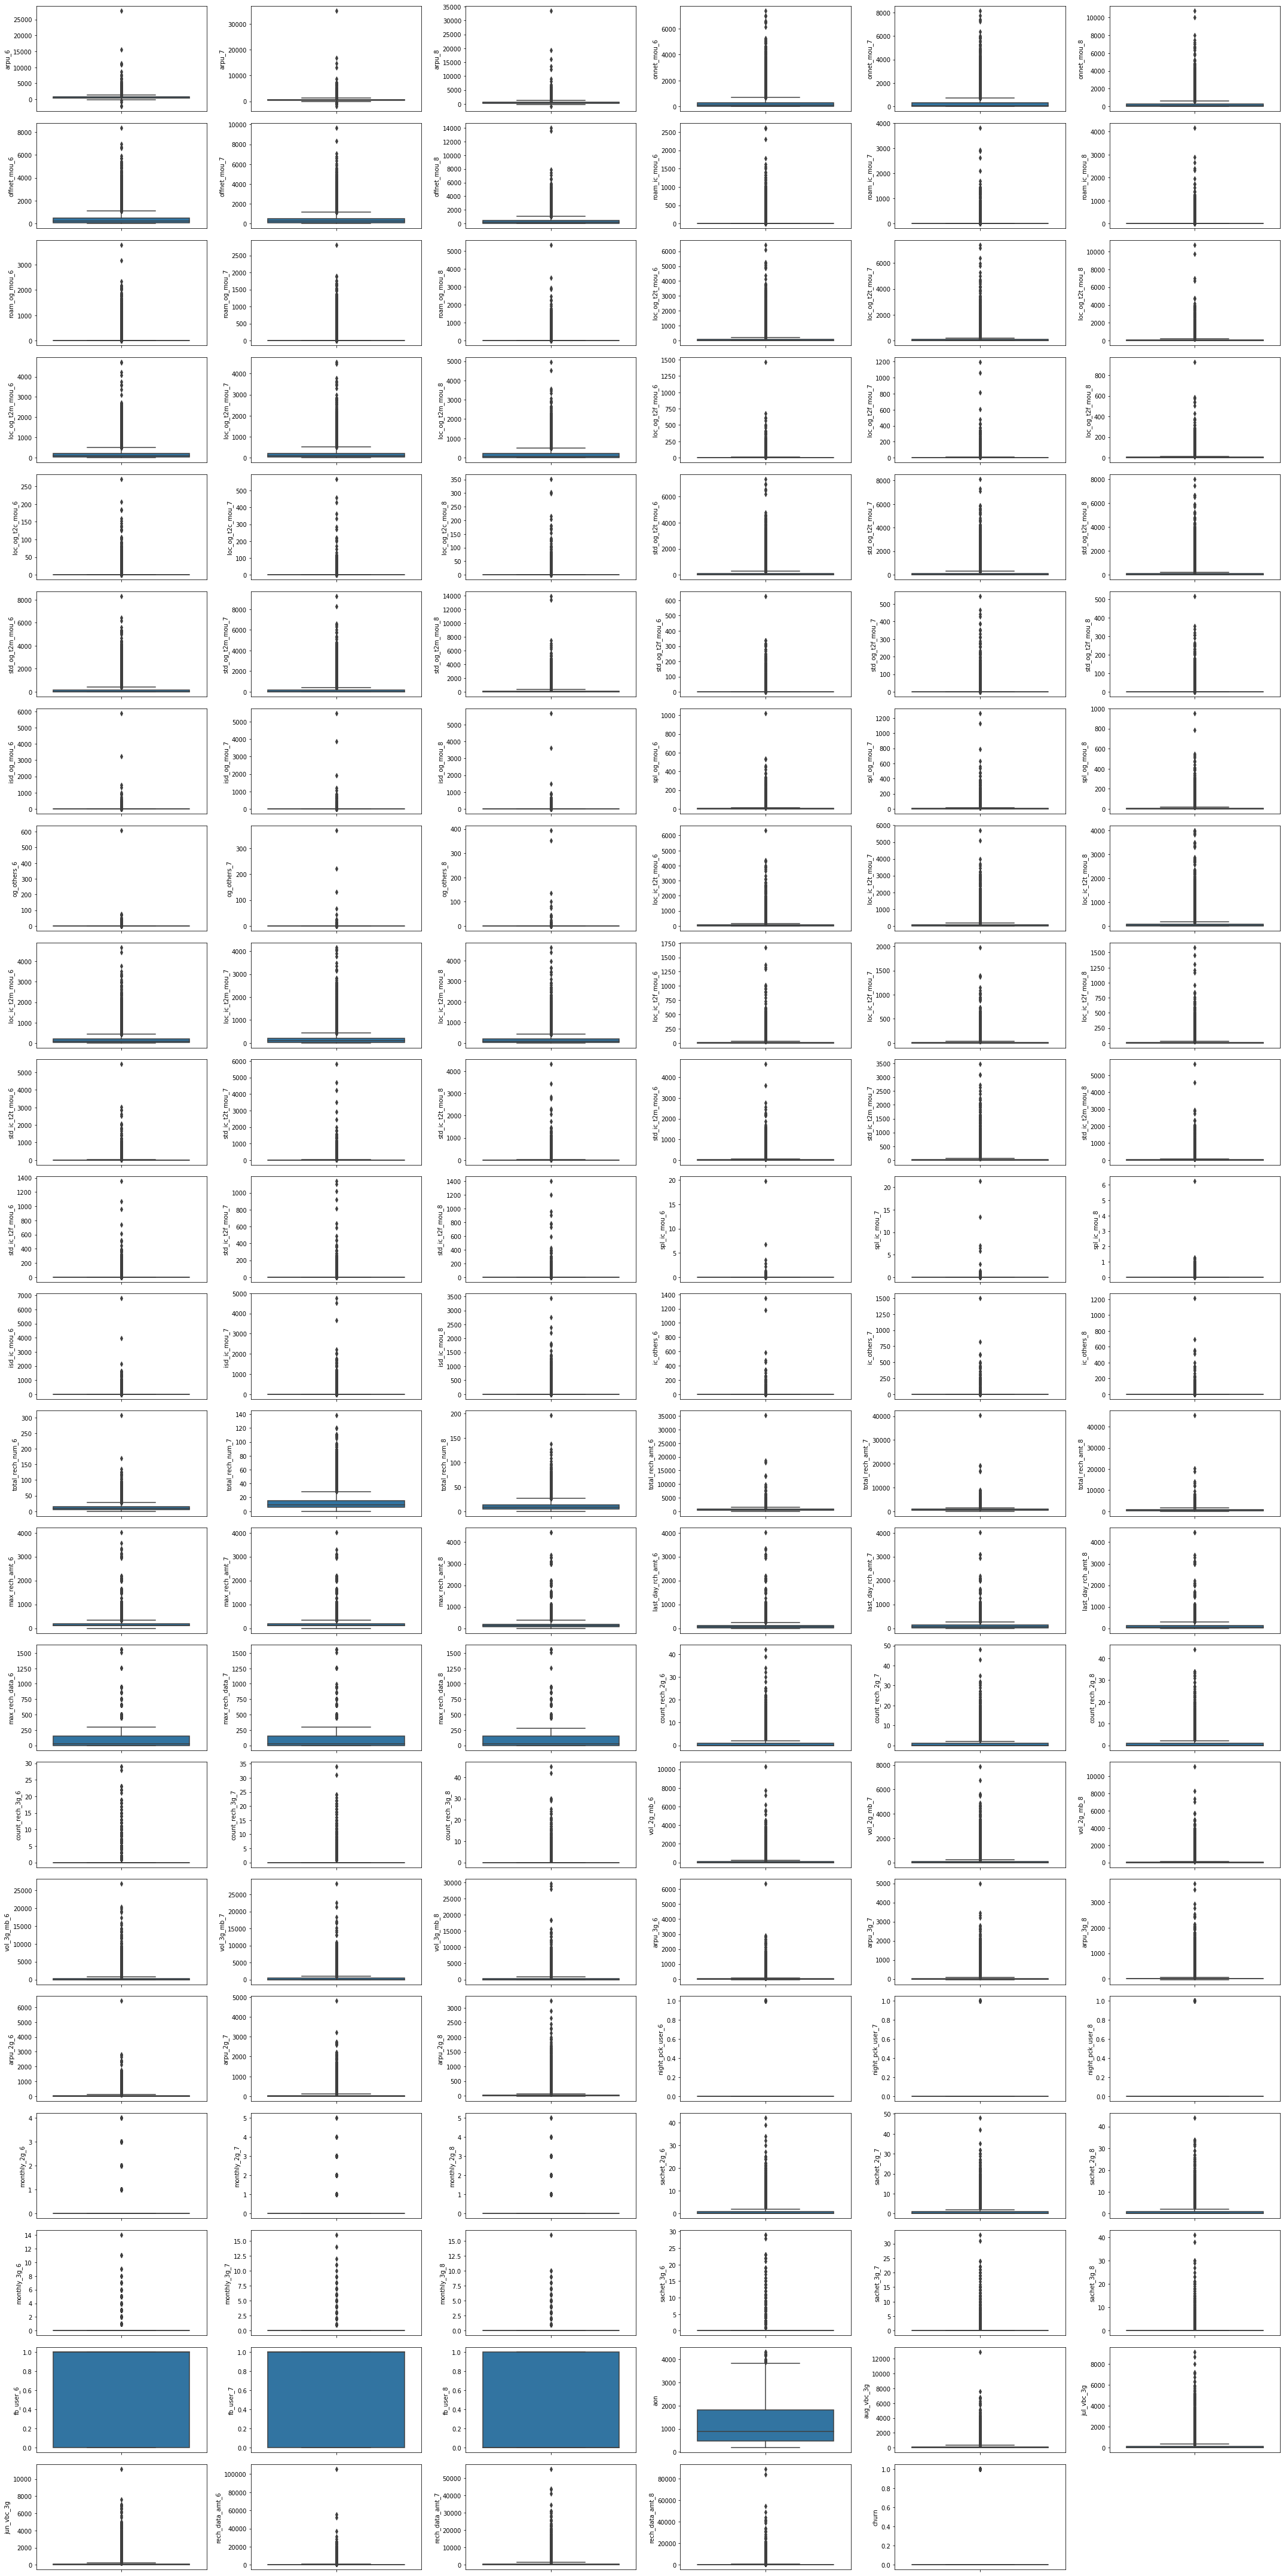

In [45]:
plt.figure(figsize=(30,60))

for i in range(len(num_cols)):
    
    plt.subplot(22, 6, i+1)
    sns.boxplot(y = num_cols[i], data = telecom)

plt.tight_layout()
plt.show()

We can see that there are outliers in most of the numerical columns. We will first check the percentage of records which will be eliminated if we are removing these outliers using IQR method.

In [46]:
telecom.shape

(28504, 134)

In [47]:
outliers = telecom.copy()
initial = len(outliers.index)
for i in range(len(num_cols)):
    Q1 = outliers[num_cols[i]].quantile(0.05)
    Q3 = outliers[num_cols[i]].quantile(0.95)
    IQR = Q3 - Q1
    outliers = outliers[(outliers[num_cols[i]] >= Q1 - 1.5*IQR) & (outliers[num_cols[i]] <= Q3 + 1.5*IQR)]

final = len(outliers.index)
print(round((initial - final)/initial * 100, 2))

62.43


We can see that around 62% of records will be removed with outliers treatment. Hence for the purpose of this assignment, we will not remove the outliers.

### Dummy Variables

In [48]:
telecom.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
33              0.00               0.0               0.0              0.56   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
21            808.74            876.99              0.00              0.00   
23              6.35             39.61              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
7              16.68           0.0          0.18         10.01           4.5   
8               0.00           0.0          0.00          0.00           0.0   
21              0.00           0.0          0.00          0.00           0.0   
23              0.00    

In [49]:
# Getting all the categorical columns
cat_cols = list(telecom.dtypes[telecom.dtypes == 'object'].index)
cat_cols

['recharged_data_6', 'recharged_data_7', 'recharged_data_8']

In [50]:
# Creating the dummy variables for the categorical columns
for col in cat_cols:
    # Get the dummy variables for the categorical features and store them in telecom_dummy
    telecom_dummy = pd.get_dummies(telecom[col], prefix = col, drop_first = True)
    # Add the results to the original telecom dataframe
    telecom = pd.concat([telecom, telecom_dummy], axis = 1)
    telecom.drop(col, axis = 1, inplace = True)
    
telecom.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
33              0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
33              0.00               0.0               0.0              0.56   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   
33              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7              31.76             49.14              6.66             20.08   
8              10.04             75.69              0.00              0.00   
21            808.74            876.99              0.00              0.00   
23              6.35             39.61              0.00              0.00   
33              0.00              0.00              0.00              0.00   

    std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
7              16.68           0.0          0.18         10.01           4.5   
8               0.00           0.0          0.00          0.00           0.0   
21              0.00           0.0          0.00          0.00           0.0   
23              0.00    

### Train - Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Putting feature variables to X
X = telecom.drop('churn', axis = 1)
# Putting the response variable to y
y = telecom['churn']

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19952, 133)
(19952,)
(8552, 133)
(8552,)


In [54]:
# Checking the average churn rates in train and test data, which should be comparable
print(y_train.mean())
print(y_test.mean())

0.05603448275862069
0.0558933582787652


### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler 

In [56]:
scaler = StandardScaler()

# Getting all the numerical columns
num_cols = list(X_train.dtypes[X_train.dtypes != 'object'].index)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
48205 -1.178856  0.869377  0.768302    -0.556357     0.621128     0.525576   
84772 -0.131786  0.003445  0.285096    -0.510588    -0.278526    -0.404248   
77543 -0.805205 -0.608355 -0.997949    -0.577318    -0.571070    -0.528862   
9678  -0.865454 -0.639163 -1.028448    -0.580269    -0.572581    -0.528862   
38706  0.449827 -0.289076 -0.058130     0.231861    -0.246856    -0.049307   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
48205     -0.791762      1.899539      2.153848       0.030630      -0.088736   
84772     -0.511666     -0.422620     -0.314978      -0.208404       1.176623   
77543     -0.765548     -0.778519     -0.730794      -0.208404      -0.163419   
9678      -0.795003     -0.781784     -0.732177      -0.208404      -0.163419   
38706      0.015206     -0.125356     -0.184399      -0.208404      -0.163419   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
48205      -0.105355      -0.121597      -0.165100      -0.075412   
84772       0.525570      -0.230625       0.676475       0.069239   
77543      -0.166545      -0.230625      -0.212611      -0.201830   
9678       -0.166545      -0.230625      -0.212611      -0.201830   
38706      -0.166545      -0.230625      -0.212611      -0.201830   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
48205         -0.371007          0.329382          0.290350         -0.667703   
84772         -0.237347          0.093077         -0.212073         -0.340076   
77543         -0.365347         -0.361652         -0.349251         -0.637883   
9678          -0.371007         -0.364612         -0.349251         -0.667703   
38706          1.186791          0.250641          0.583037          0.499621   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
48205          0.978974          0.709285         -0.288157         -0.274626   
84772         -0.376219         -0.220617          0.530353          0.558439   
77543         -0.689483         -0.677142         -0.229412         -0.283776   
9678          -0.695141         -0.677142         -0.288157         -0.294668   
38706          0.605190          0.399771          2.883624         -0.082045   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
48205         -0.175800         -0.255413         -0.206087         -0.156491   
84772          0.924339         -0.255413         -0.206087         -0.240901   
77543         -0.274379          0.599576         -0.206087         -0.240901   
9678          -0.306910         -0.255413         -0.206087         -0.240901   
38706          0.025794          1.493799         -0.206087         -0.240901   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
48205         -0.419208          0.533725          0.450995         -0.445817   
84772         -0.419208         -0.400083         -0.338594         -0.408022   
77543         -0.419208         -0.422693         -0.385775         -0.445817   
9678          -0.419208         -0.422693         -0.385775         -0.445817   
38706         -0.419208         -0.409425         -0.385775         -0.428863   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
48205          1.675149          2.121823         -0.148787         -0.143595   
84772         -0.428786         -0.367554         -0.148787         -0.075528   
77543         -0.442598         -0.400422         -0.148787         -0.143595   
9678          -0.442598         -0.400422         -0.148787         -0.143595   
38706         -0.429634         -0.398069          0.101216         -0.143595   

       std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
48205          0.039197     -0.056617     -0.012612      -0.04416   
84772          0.156394     -0.056617     -0.050319      -0.05362

In [57]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
23592 -0.764242 -0.645081 -0.610183    -0.580269    -0.572581    -0.528862   
29640 -1.039928 -1.006289 -0.812639    -0.580269    -0.572581    -0.528862   
11357  0.180948 -0.856475 -0.965247    -0.436470    -0.393822    -0.476700   
37103 -0.361881  0.079683  0.121994     0.060456     0.103128     0.071244   
17466  0.255796 -0.317138 -0.283330     4.545402     3.368074     2.303255   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
23592     -0.795003     -0.781784     -0.732177      -0.208404      -0.163419   
29640     -0.777527     -0.781784     -0.732177      -0.208404      -0.163419   
11357     -0.600843     -0.447460     -0.668239      -0.208404      -0.163419   
37103     -0.381035     -0.481836     -0.228847      -0.208404      -0.163419   
17466      0.570215      0.422635      0.557498      -0.208404      -0.163419   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
23592      -0.166545      -0.230625      -0.212611       -0.20183   
29640      -0.166545      -0.230625      -0.212611       -0.20183   
11357      -0.166545      -0.230625      -0.212611       -0.20183   
37103      -0.166545      -0.230625      -0.212611       -0.20183   
17466      -0.166545      -0.230625      -0.212611       -0.20183   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
23592         -0.371007         -0.364612         -0.349251         -0.667703   
29640         -0.371007         -0.364612         -0.349251         -0.667703   
11357         -0.095177         -0.014452         -0.247846         -0.336581   
37103          0.210756          0.163344          0.156635         -0.361597   
17466          9.460863          7.354465          5.156586          1.539404   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
23592         -0.695141         -0.677142         -0.288157         -0.294668   
29640         -0.695141         -0.677142         -0.288157         -0.294668   
11357         -0.023593         -0.549405         -0.288157         -0.294668   
37103         -0.343007          0.081426         -0.288157         -0.275933   
17466          1.161643          1.099840         -0.274667         -0.294668   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
23592         -0.306910         -0.255413         -0.206087         -0.240901   
29640         -0.306910         -0.255413         -0.206087         -0.240901   
11357         -0.286701         -0.255413         -0.206087         -0.240901   
37103         -0.306910         -0.255413         -0.206087          0.510343   
17466         -0.306910         -0.255413         -0.206087         -0.240901   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
23592         -0.419208         -0.422693         -0.385775         -0.445817   
29640         -0.419208         -0.422693         -0.385775         -0.445817   
11357         -0.419208         -0.422693         -0.385775         -0.445817   
37103         -0.030942          0.041408          0.008301         -0.148260   
17466         -0.419208         -0.422693         -0.385775         -0.207363   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
23592         -0.442598         -0.400422         -0.148787         -0.143595   
29640         -0.442598         -0.400422         -0.148787         -0.143595   
11357         -0.435474         -0.400422         -0.148787         -0.143595   
37103         -0.297355         -0.270741         -0.148787         -0.143595   
17466         -0.109140          0.074111         -0.148787          0.062101   

       std_og_t2f_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
23592         -0.155501     -0.056617     -0.053198      -0.05362   
29640         -0.155501     -0.056617     -0.053198      -0.05362

### Handling Class Imbalance

#### Checking Churn Rate

In [58]:
(telecom['churn'].astype('object').value_counts()/len(telecom.index)) * 100

0    94.400786
1     5.599214
Name: churn, dtype: float64

We have about 6% churn rate indicating that there is a high class imbalance.

<b> Problem with Imbalanced Classes: </b> <br> <br>
Machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error. Most models completely ignore the minority class in favor of the majority class. <br> <br>

The three commonly used techniques for handling imbalanced data are:
1. Oversample minority class: Oversampling can be defined as adding more copies of the minority class. Oversampling is used when we do not have a lot of data.
2. Undersample majority class: Undersampling can be defined as removing some observations of the majority class. Undersampling is used when we have a lot of data to work with. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.
3. Generate synthetic samples: This technique is similar to upsampling in that we create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model. <br> <br>

For our assignment, we will used the SMOTE technique to handle class imbalance.

#### Synthetic Minority Oversampling Technique (SMOTE)

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE(random_state=27, ratio=1.0)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

In [61]:
print(X_train_bal.shape)
print(y_train_bal.shape)

(37668, 133)
(37668,)


We can see that now we have an equal ratio of data points for each class. So we will use this balanced training data to apply PCA on and build our models.

## Model Building and Evaluation

In [62]:
def ModelMetrics(y_test, y_test_pred):
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

    # Printing classification report
    print("********* Classification Report *********")
    print(classification_report(y_test, y_test_pred))

    # Printing confusion matrix and accuracy
    print("**** Confusion Matrix ****")
    confusion_mat = confusion_matrix(y_test, y_test_pred)
    print(confusion_mat)
    print('\n')
    
    TP = confusion_mat[1,1] # true positive 
    TN = confusion_mat[0,0] # true negatives
    FP = confusion_mat[0,1] # false positives
    FN = confusion_mat[1,0] # false negatives
    
    print("Accuracy Score: " + str(round(accuracy_score(y_test, y_test_pred), 4)))
    print("Sensitivity: " + str(round(TP/float(TP+FN), 4)))
    print("Specificity: " + str(round(TN/float(TN+FP), 4)))
    print("False Positive Rate: " + str(round(FP/float(TN+FP), 4)))
    print("Positive Predictive Value: " + str(round(TP/float(TP+FP), 4)))
    print("Negative Predictive Value: " + str(round(TN/float(TN+FN), 4)))
    precision = round(TP/float(TP+FP), 4)
    print("Precision: " + str(precision))
    recall = round(TP/float(TP+FN), 4)
    print("Recall: " + str(recall))
    F1 = round(2 * (precision*recall)/(precision+recall), 4)
    print("F1 Score: " + str(F1))

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

In [64]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

### Performing PCA on the Data

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(random_state = 100)
pca.fit(X_train_bal)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
pca.components_

array([[-5.22758074e-02, -3.87441923e-02,  5.42583537e-03, ...,
         1.97549761e-01,  2.01766552e-01,  1.73692854e-01],
       [ 2.12105911e-01,  2.36328528e-01,  2.08437440e-01, ...,
        -5.39003559e-02, -4.91399189e-02, -9.08591315e-03],
       [-6.47194858e-02, -8.54605480e-02, -6.90329694e-02, ...,
         1.91629994e-02,  1.30688247e-02, -9.10899588e-03],
       ...,
       [-0.00000000e+00,  1.89793217e-16, -7.15358217e-17, ...,
         1.53498178e-16, -1.62744852e-16, -1.27849296e-16],
       [ 0.00000000e+00, -2.14847453e-18, -4.48263450e-17, ...,
        -1.47365661e-16,  1.57311096e-16, -1.29694610e-16],
       [ 0.00000000e+00,  1.05825869e-16,  8.97588583e-17, ...,
        -1.91821420e-16,  2.75870019e-17, -1.06648860e-16]])

In [68]:
pca.explained_variance_ratio_

array([1.11038721e-01, 8.04508469e-02, 5.97848681e-02, 5.04849560e-02,
       4.57318872e-02, 4.42626151e-02, 3.70036593e-02, 2.80514187e-02,
       2.61136611e-02, 2.05319113e-02, 2.02442749e-02, 1.81775123e-02,
       1.79954738e-02, 1.66086501e-02, 1.55876137e-02, 1.49186101e-02,
       1.43106901e-02, 1.40908653e-02, 1.34713458e-02, 1.30722101e-02,
       1.28426456e-02, 1.23432216e-02, 1.19916872e-02, 1.16831333e-02,
       1.09544895e-02, 1.05876392e-02, 1.04444932e-02, 1.01957879e-02,
       9.36285253e-03, 8.74020008e-03, 8.12697460e-03, 7.99137517e-03,
       7.35532498e-03, 7.13992064e-03, 6.99377868e-03, 6.83270651e-03,
       6.57134203e-03, 6.40621955e-03, 6.18466559e-03, 5.85854006e-03,
       5.77432731e-03, 5.55702036e-03, 5.50032375e-03, 5.16851883e-03,
       5.09995443e-03, 4.97658450e-03, 4.64669171e-03, 4.61624903e-03,
       4.31118470e-03, 4.17161360e-03, 3.59650613e-03, 3.51476603e-03,
       3.33673708e-03, 3.25423026e-03, 3.15823723e-03, 3.06518014e-03,
      

#### Scree Plot

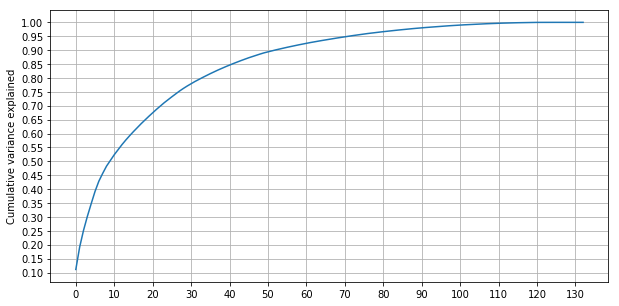

In [69]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
ax.set_xticks(np.arange(0,150,10))
ax.set_yticks(np.arange(0,1.5,0.05))
plt.ylabel('Cumulative variance explained')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

From the above scree plot, we can see that 80 components describe about 95% of the variance. Hence we will select the number of components as 80.

In [70]:
from sklearn.decomposition import IncrementalPCA

In [71]:
pca_final = IncrementalPCA(n_components = 80)
X_train_pca = pca_final.fit_transform(X_train_bal)
X_train_pca.shape

(37668, 80)

In [72]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(80, 80)

#### Plotting the heatmap of the coefficient matrix

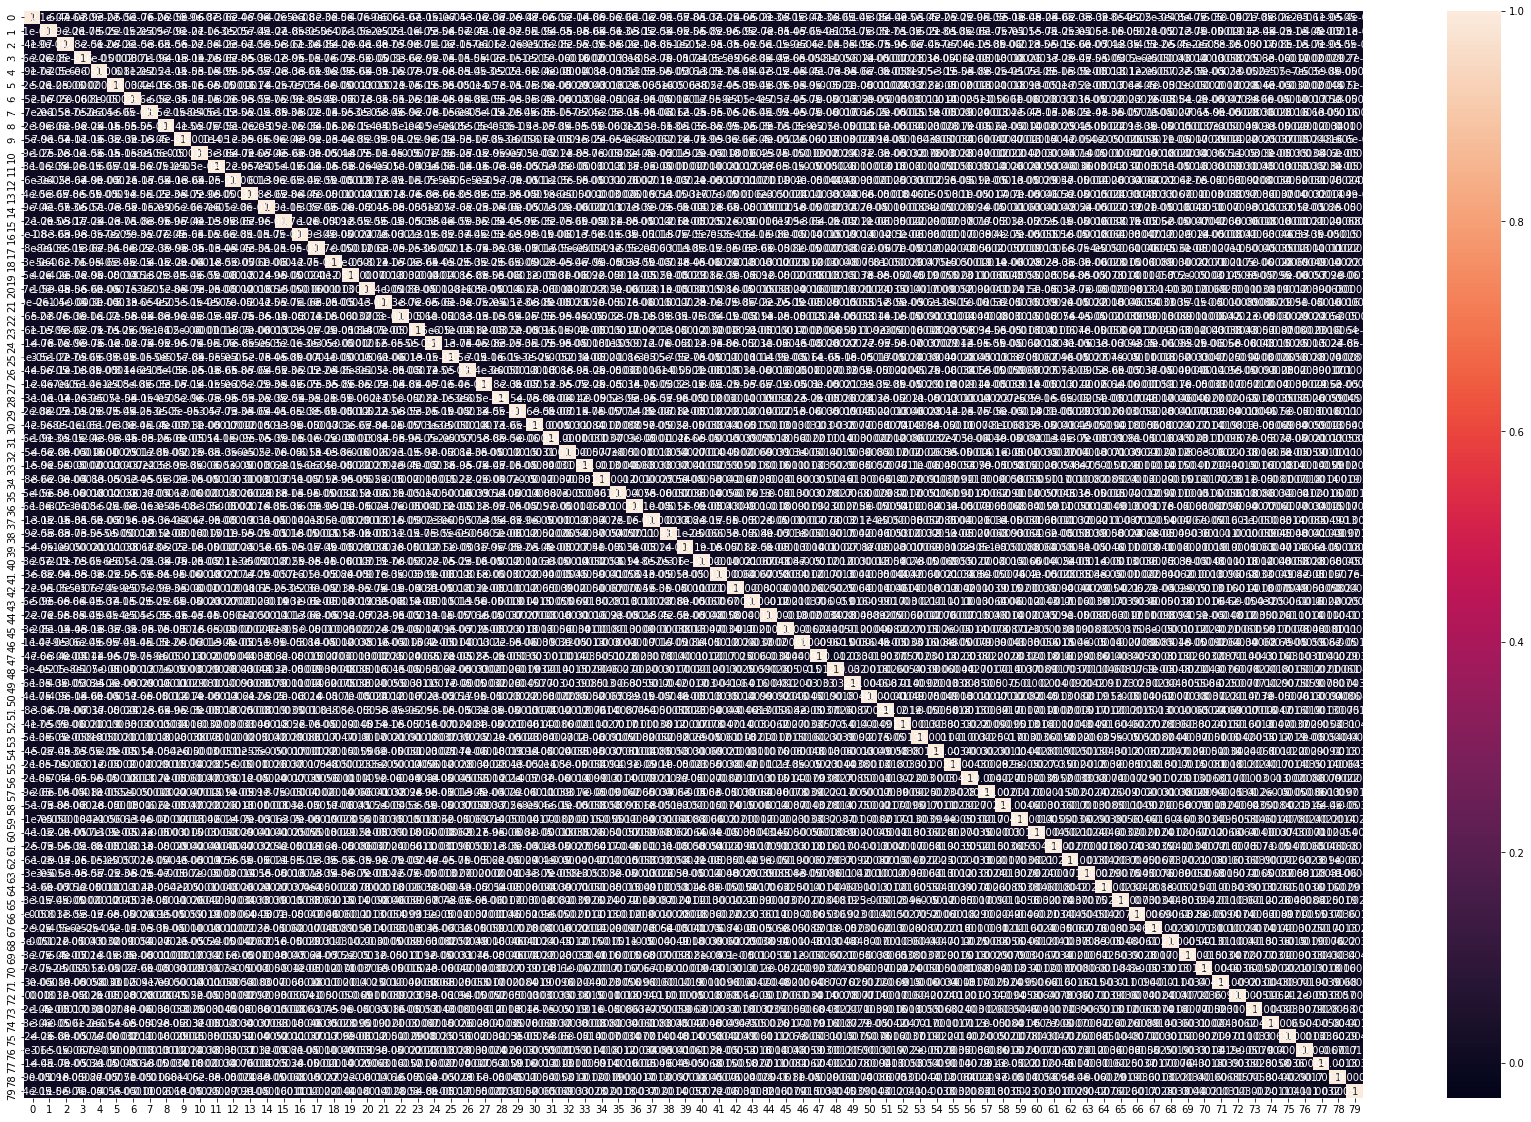

In [73]:
plt.figure(figsize = [30,20])
sns.heatmap(corrmat, annot = True)

From the above correlation matrix, we can establish that the Principal Components are not correlated with each other. Thus we have handled multicollinearity using PCA.

#### Applying the transformation on the test set

In [74]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8552, 80)

### 1. Logisitic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train_bal)

#### Predictions on the test set

In [77]:
# Making predictions
y_pred = lr.predict_proba(X_test_pca)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.114847
1  0.346036
2  0.607320
3  0.242866
4  0.136733

In [78]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
23592      0
29640      0
11357      0
37103      0
17466      0

In [79]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)

y_pred_final.head()

CustID  churn  Churn_Prob
0   23592      0    0.114847
1   29640      0    0.346036
2   11357      0    0.607320
3   37103      0    0.242866
4   17466      0    0.136733

In [80]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

CustID  churn  Churn_Prob  predicted
0   23592      0    0.114847          0
1   29640      0    0.346036          0
2   11357      0    0.607320          1
3   37103      0    0.242866          0
4   17466      0    0.136733          0

In [81]:
ModelMetrics(y_pred_final.churn, y_pred_final.predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8074
           1       0.20      0.79      0.31       478

    accuracy                           0.81      8552
   macro avg       0.59      0.80      0.60      8552
weighted avg       0.94      0.81      0.86      8552

**** Confusion Matrix ****
[[6518 1556]
 [ 100  378]]


Accuracy Score: 0.8064
Sensitivity: 0.7908
Specificity: 0.8073
False Positive Rate: 0.1927
Positive Predictive Value: 0.1954
Negative Predictive Value: 0.9849
Precision: 0.1954
Recall: 0.7908
F1 Score: 0.3134


#### Logisitic Regression with hyperparameters tuning :  Tuning penalty, C and solver

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# GridSearchCV to find optimal hyperparameters 

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'penalty' : ['l1', 'l2'], # l1 or l2 regularization
              'C' : np.logspace(-4, 4, 20), # size of penalty
              'solver' : ['liblinear']} # type of solver used  

# instantiate the model
logsk = LogisticRegression(random_state = 100)

# fit tree on training data
log_grid = GridSearchCV(estimator = logsk, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
log_grid.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.63...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [84]:
cv_results = pd.DataFrame(log_grid.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
19       0.882975      0.156858         0.005401        0.000800  0.615848   
17       0.857469      0.122442         0.004400        0.000490  0.233572   
16       0.435445      0.045438         0.004800        0.000748  0.233572   
18       0.461044      0.067579         0.004801        0.000400  0.615848   
20       0.480846      0.087448         0.005000        0.000633   1.62378   

   param_penalty param_solver  \
19            l2    liblinear   
17            l2    liblinear   
16            l1    liblinear   
18            l1    liblinear   
20            l1    liblinear   

                                               params  split0_test_score  \
19  {'C': 0.615848211066026, 'penalty': 'l2', 'sol...           0.826918   
17  {'C': 0.23357214690901212, 'penalty': 'l2', 's...           0.827183   
16  {'C': 0.23357214690901212, 'penalty': 'l1', 's...           0.826122   
18  {'C': 0.615848211066026, 'penalty': 'l1', 'sol...           0.826387   
20  {'C': 1.623776739188721, 'penalty': 'l1', 'sol...           0.826918   

    split1_test_score  split2_test_score  split3_test_score  \
19           0.847624           0.835944           0.846256   
17           0.847624           0.835944           0.846256   
16           0.846828           0.836475           0.846787   
18           0.846828           0.836209           0.846522   
20           0.847359           0.835944           0.846256   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
19           0.833820         0.838112        0.007813                1   
17           0.833555         0.838112        0.007768                1   
16           0.834085         0.838059        0.007923                3   
18           0.834351         0.838059        0.007771                4   
20           0.833820         0.838059        0.007749                5   

    split0_train_score  split1_train_score  split2_train_score  \
19            0.842238            0.837194            0.838521   
17            0.842172            0.836995            0.838389   
16            0.841840            0.836729            0.838057   
18            0.841773            0.836928            0.838123   
20            0.842238            0.837127            0.838389   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
19            0.839594            0.839583          0.839426         0.001659  
17            0.839594            0.839251          0.839280         0.001702  
16            0.839395            0.839650          0.839134         0.001709  
18            0.839594            0.839782          0.839240         0.001639  
20            0.839461            0.839650          0.839373         0.001691

In [85]:
log_grid.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

#### Fitting the final model with the best parameters obtained from grid search

In [86]:
lr = LogisticRegression(C=2.3357e-1, solver='liblinear', penalty='l2')
lr = lr.fit(X_train_pca, y_train_bal)

#### Predictions on the test set

In [87]:
# Making predictions
y_pred = lr.predict_proba(X_test_pca)

# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1.head()

1
0  0.114969
1  0.346062
2  0.607508
3  0.243368
4  0.136772

In [88]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
23592      0
29640      0
11357      0
37103      0
17466      0

In [89]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)

y_pred_final.head()

CustID  churn  Churn_Prob
0   23592      0    0.114969
1   29640      0    0.346062
2   11357      0    0.607508
3   37103      0    0.243368
4   17466      0    0.136772

In [90]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

CustID  churn  Churn_Prob  predicted
0   23592      0    0.114969          0
1   29640      0    0.346062          0
2   11357      0    0.607508          1
3   37103      0    0.243368          0
4   17466      0    0.136772          0

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced accuracy, sensitivity and specificity

In [91]:
y_pred_final.head()

CustID  churn  Churn_Prob  predicted
0   23592      0    0.114969          0
1   29640      0    0.346062          0
2   11357      0    0.607508          1
3   37103      0    0.243368          0
4   17466      0    0.136772          0

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

CustID  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   23592      0    0.114969          0    1    1    0    0    0    0    0   
1   29640      0    0.346062          0    1    1    1    1    0    0    0   
2   11357      0    0.607508          1    1    1    1    1    1    1    1   
3   37103      0    0.243368          0    1    1    1    0    0    0    0   
4   17466      0    0.136772          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.055893  1.000000  0.000000
0.1   0.1  0.385992  0.958159  0.352118
0.2   0.2  0.546422  0.916318  0.524523
0.3   0.3  0.655168  0.887029  0.641442
0.4   0.4  0.739242  0.845188  0.732970
0.5   0.5  0.806244  0.790795  0.807159
0.6   0.6  0.857343  0.730126  0.864875
0.7   0.7  0.897100  0.648536  0.911816
0.8   0.8  0.924228  0.520921  0.948105
0.9   0.9  0.938377  0.282427  0.977211


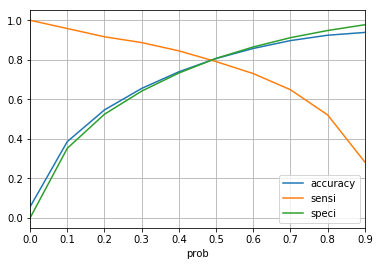

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid = True)
plt.show()

From the curve above, we will take 0.48 as the optimum cutoff probability.

In [95]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.48 else 0)

y_pred_final.head()

CustID  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   23592      0    0.114969          0    1    1    0    0    0    0    0   
1   29640      0    0.346062          0    1    1    1    1    0    0    0   
2   11357      0    0.607508          1    1    1    1    1    1    1    1   
3   37103      0    0.243368          0    1    1    1    0    0    0    0   
4   17466      0    0.136772          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                0  
4    0    0    0                0

#### Metrics Analysis on the test set for Logisitic Regression Model

In [96]:
ModelMetrics(y_pred_final.churn, y_pred_final.final_predicted)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8074
           1       0.19      0.81      0.31       478

    accuracy                           0.79      8552
   macro avg       0.59      0.80      0.59      8552
weighted avg       0.94      0.79      0.85      8552

**** Confusion Matrix ****
[[6404 1670]
 [  91  387]]


Accuracy Score: 0.7941
Sensitivity: 0.8096
Specificity: 0.7932
False Positive Rate: 0.2068
Positive Predictive Value: 0.1881
Negative Predictive Value: 0.986
Precision: 0.1881
Recall: 0.8096
F1 Score: 0.3053


#### Plotting the ROC Curve for the Test Dataset

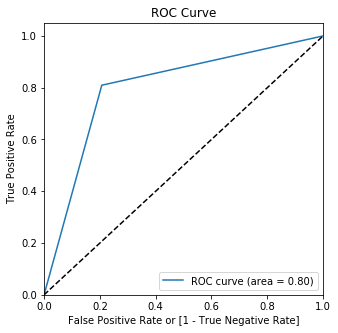

In [97]:
draw_roc(y_pred_final.churn, y_pred_final.final_predicted)

### 2. Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

#### Decision tree with default hyperparameters

In [99]:
churn_tree = DecisionTreeClassifier(max_depth = 10)
churn_tree.fit(X_train_pca, y_train_bal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
# Making predictions
y_test_pred = churn_tree.predict(X_test_pca)

In [101]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8074
           1       0.15      0.59      0.24       478

    accuracy                           0.79      8552
   macro avg       0.56      0.70      0.56      8552
weighted avg       0.93      0.79      0.85      8552

**** Confusion Matrix ****
[[6515 1559]
 [ 195  283]]


Accuracy Score: 0.7949
Sensitivity: 0.5921
Specificity: 0.8069
False Positive Rate: 0.1931
Positive Predictive Value: 0.1536
Negative Predictive Value: 0.9709
Precision: 0.1536
Recall: 0.5921
F1 Score: 0.2439


#### Decision tree with hyperparameters tuning : Tuning max_depth

In [102]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
tree.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [103]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
16       3.874731      0.094946         0.006707        0.001326   
15       3.755715      0.136854         0.006601        0.001020   
17       4.110276      0.254104         0.006401        0.000800   
18       4.008745      0.092536         0.006000        0.000894   
19       4.057625      0.080864         0.006201        0.000400   

   param_max_depth             params  split0_test_score  split1_test_score  \
16              17  {'max_depth': 17}           0.924608           0.925670   
15              16  {'max_depth': 16}           0.920892           0.926467   
17              18  {'max_depth': 18}           0.922750           0.927794   
18              19  {'max_depth': 19}           0.921688           0.924078   
19              20  {'max_depth': 20}           0.923016           0.924874   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
16           0.931510           0.934413           0.935492         0.930339   
15           0.931776           0.934944           0.937351         0.930286   
17           0.932307           0.930961           0.931776         0.929118   
18           0.932307           0.934148           0.933103         0.929065   
19           0.932838           0.930165           0.934431         0.929065   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
16        0.004453                1            0.996881            0.997743   
15        0.005944                2            0.995951            0.995221   
17        0.003548                3            0.998407            0.998009   
18        0.005137                4            0.998673            0.998208   
19        0.004436                5            0.998341            0.999004   

    split2_train_score  split3_train_score  split4_train_score  \
16            0.994823            0.996350            0.998075   
15            0.992235            0.995620            0.995752   
17            0.998274            0.996018            0.998540   
18            0.998673            0.999137            0.999137   
19            0.999004            0.999204            0.999071   

    mean_train_score  std_train_score  
16          0.996774         0.001152  
15          0.994956         0.001381  
17          0.997850         0.000932  
18          0.998766         0.000348  
19          0.998925         0.000301

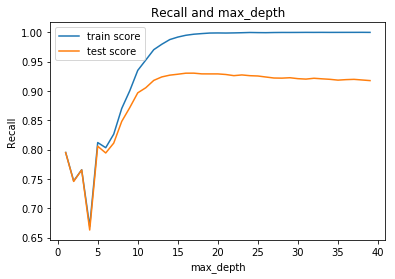

In [104]:
# plotting mean test and train scores with max_depth 
plt.figure()

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Recall')
plt.title("Recall and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_leaf

In [105]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
tree.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [106]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.434042      0.093389         0.005801        0.000400   
1       3.669429      0.062905         0.006401        0.000800   
2       3.278069      0.065670         0.006801        0.001601   
3       3.150191      0.121658         0.006401        0.000801   
4       2.997343      0.098457         0.006401        0.001020   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.882665   
1                     25  {'min_samples_leaf': 25}           0.839926   
2                     45  {'min_samples_leaf': 45}           0.829573   
3                     65  {'min_samples_leaf': 65}           0.809132   
4                     85  {'min_samples_leaf': 85}           0.796921   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.887709           0.903371           0.892724           0.890098   
1           0.844969           0.853730           0.864312           0.862490   
2           0.825060           0.825856           0.852363           0.850544   
3           0.829307           0.798248           0.840414           0.835413   
4           0.828776           0.814176           0.837759           0.819485   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.891314        0.006880                1            0.959713   
1         0.853085        0.009528                2            0.891883   
2         0.836679        0.012173                3            0.869715   
3         0.822503        0.016130                4            0.853056   
4         0.819423        0.013839                5            0.833875   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.959249            0.963098            0.958920   
1            0.893277            0.901971            0.901447   
2            0.863277            0.860357            0.874170   
3            0.855247            0.836397            0.854858   
4            0.849141            0.846353            0.848420   

   split4_train_score  mean_train_score  std_train_score  
0            0.959448          0.960085         0.001528  
1            0.898653          0.897446         0.004154  
2            0.881994          0.869903         0.007739  
3            0.869251          0.853762         0.010443  
4            0.841973          0.843952         0.005623

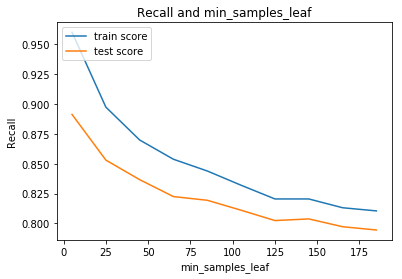

In [107]:
# plotting mean test and train scores with min_samples_leaf
plt.figure()

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('Recall')
plt.title("Recall and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Decision tree with hyperparameters tuning : Tuning min_samples_split

In [108]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
tree.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [109]:
cv_results = pd.DataFrame(tree.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.070484      0.158103         0.006801        0.000400   
1       5.011704      0.171078         0.007001        0.001265   
2       5.043198      0.158476         0.007001        0.000632   
3       4.978643      0.140775         0.006800        0.000749   
4       4.967118      0.213348         0.006400        0.000800   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.903902   
1                      25  {'min_samples_split': 25}           0.872843   
2                      45  {'min_samples_split': 45}           0.853730   
3                      65  {'min_samples_split': 65}           0.838598   
4                      85  {'min_samples_split': 85}           0.835678   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.900451           0.908415           0.915295           0.913459   
1           0.883993           0.883196           0.887148           0.876560   
2           0.863021           0.865676           0.874403           0.868596   
3           0.846562           0.851341           0.873871           0.863021   
4           0.836209           0.839395           0.860329           0.850544   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.908305        0.005595                1            0.992102   
1         0.880748        0.005244                2            0.954337   
2         0.865085        0.006822                3            0.929448   
3         0.854679        0.012438                4            0.915909   
4         0.844431        0.009589                5            0.905821   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.992633            0.992699            0.993695   
1            0.957789            0.958253            0.957260   
2            0.931373            0.928918            0.936289   
3            0.907613            0.909537            0.927860   
4            0.890688            0.889494            0.904964   

   split4_train_score  mean_train_score  std_train_score  
0            0.992102          0.992646         0.000582  
1            0.952811          0.956090         0.002134  
2            0.935156          0.932237         0.002983  
3            0.917966          0.915777         0.007161  
4            0.905422          0.899278         0.007515

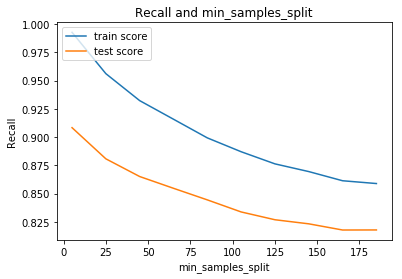

In [110]:
# plotting mean test and train scores with min_samples_split
plt.figure()

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('Recall')
plt.title("Recall and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [111]:
# model with optimal hyperparameters
tree_final = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=17, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
tree_final.fit(X_train_pca, y_train_bal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

#### Predictions on the test set

In [112]:
y_test_pred = tree_final.predict(X_test_pca)

#### Metrics Analysis on the test set for Decision Tree

In [113]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8074
           1       0.17      0.48      0.26       478

    accuracy                           0.84      8552
   macro avg       0.57      0.67      0.58      8552
weighted avg       0.92      0.84      0.88      8552

**** Confusion Matrix ****
[[6982 1092]
 [ 248  230]]


Accuracy Score: 0.8433
Sensitivity: 0.4812
Specificity: 0.8648
False Positive Rate: 0.1352
Positive Predictive Value: 0.174
Negative Predictive Value: 0.9657
Precision: 0.174
Recall: 0.4812
F1 Score: 0.2556


#### Plotting the ROC Curve for the Test Dataset

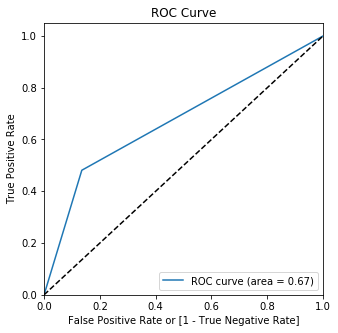

In [114]:
draw_roc(y_test, y_test_pred)

### 3. Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

#### Random Forest with default hyperparameters

In [116]:
churn_forest = RandomForestClassifier(max_depth = 5)
churn_forest.fit(X_train_pca, y_train_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
# Making predictions
y_test_pred = churn_forest.predict(X_test_pca)

In [118]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8074
           1       0.18      0.68      0.28       478

    accuracy                           0.80      8552
   macro avg       0.58      0.75      0.58      8552
weighted avg       0.93      0.80      0.85      8552

**** Confusion Matrix ****
[[6547 1527]
 [ 152  326]]


Accuracy Score: 0.8037
Sensitivity: 0.682
Specificity: 0.8109
False Positive Rate: 0.1891
Positive Predictive Value: 0.1759
Negative Predictive Value: 0.9773
Precision: 0.1759
Recall: 0.682
F1 Score: 0.2797


#### Random forest with hyperparameters tuning : Tuning max_depth

In [119]:
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
rf.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [120]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3      23.813304      0.132524         0.134609        0.007813   
2      20.291291      0.086042         0.123341        0.014775   
1      14.003080      0.178886         0.081407        0.007659   
0       4.818413      0.156442         0.055005        0.003633   

  param_max_depth             params  split0_test_score  split1_test_score  \
3              17  {'max_depth': 17}           0.986196           0.977170   
2              12  {'max_depth': 12}           0.970799           0.969737   
1               7   {'max_depth': 7}           0.848686           0.862225   
0               2   {'max_depth': 2}           0.744093           0.779666   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
3           0.979028           0.981147           0.979559         0.980620   
2           0.963101           0.965481           0.964693         0.966762   
1           0.857977           0.867233           0.873374         0.861899   
0           0.772233           0.782528           0.782055         0.772115   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
3        0.003064                1            1.000000            1.000000   
2        0.002982                2            0.994690            0.994624   
1        0.008369                3            0.884317            0.879737   
0        0.014488                4            0.779120            0.778655   

   split2_train_score  split3_train_score  split4_train_score  \
3            1.000000            1.000000            1.000000   
2            0.993628            0.994425            0.993894   
1            0.881529            0.885585            0.887303   
0            0.781576            0.774622            0.775536   

   mean_train_score  std_train_score  
3          1.000000         0.000000  
2          0.994252         0.000419  
1          0.883694         0.002733  
0          0.777902         0.002526

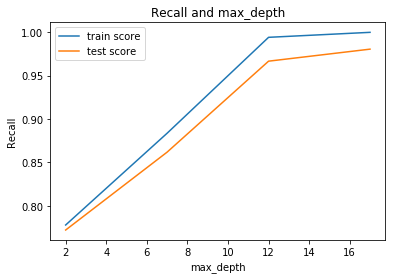

In [121]:
# plotting mean test and train scores with max_depth 
plt.figure()

plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Recall')
plt.title("Recall and max_depth")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning n_estimators

In [122]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
rf.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [123]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.854211      0.091678         0.076402        0.013867   
3      35.509987      0.120940         0.243752        0.004576   
1      17.801658      0.076838         0.132163        0.008849   
2      26.646031      0.083526         0.185344        0.006634   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.767985   
3                400  {'n_estimators': 400}           0.767720   
1                200  {'n_estimators': 200}           0.766127   
2                300  {'n_estimators': 300}           0.770905   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.801168           0.794797           0.802974           0.800372   
3           0.799575           0.792142           0.803240           0.803292   
1           0.803557           0.790550           0.805629           0.799575   
2           0.802761           0.789222           0.801381           0.800903   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.793459        0.013027                1            0.804075   
3         0.793194        0.013369                2            0.803942   
1         0.793088        0.014438                3            0.802084   
2         0.793034        0.012086                4            0.804208   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.796443            0.805403            0.796456   
3            0.795115            0.802084            0.798248   
1            0.797571            0.799496            0.799907   
2            0.796111            0.799761            0.796390   

   split4_train_score  mean_train_score  std_train_score  
0            0.797571          0.799989         0.003922  
3            0.799031          0.799684         0.003074  
1            0.796376          0.799087         0.001973  
2            0.797571          0.798808         0.002991

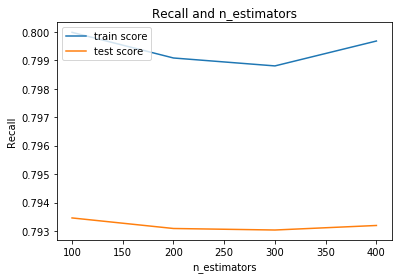

In [124]:
# plotting mean test and train scores with n_estimators
plt.figure()

plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Recall')
plt.title("Recall and n_estimators")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random Forest with hyperparameters tuning : Tuning max_features

In [125]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth=4)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
rf.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [126]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1    1297.225175   2576.038042         0.083806        0.014050   
0       4.751747      0.078878         0.070135        0.012284   
2      15.457377      1.177034         0.078626        0.022808   
3      21.650066      0.756576         0.077006        0.015661   
4      27.527382      1.531712         0.086806        0.017817   

  param_max_features                params  split0_test_score  \
1                  8   {'max_features': 8}           0.767985   
0                  4   {'max_features': 4}           0.749137   
2                 14  {'max_features': 14}           0.764534   
3                 20  {'max_features': 20}           0.762410   
4                 24  {'max_features': 24}           0.748606   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1           0.801168           0.794797           0.802974           0.800372   
0           0.803026           0.791877           0.802177           0.801434   
2           0.784444           0.785240           0.791025           0.794001   
3           0.789488           0.782055           0.791290           0.787098   
4           0.770905           0.771967           0.781200           0.769047   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
1         0.793459        0.013027                1            0.804075   
0         0.789530        0.020596                2            0.798434   
2         0.783849        0.010295                3            0.791863   
3         0.782468        0.010498                4            0.790071   
4         0.768345        0.010724                5            0.771819   

   split1_train_score  split2_train_score  split3_train_score  \
1            0.796443            0.805403            0.796456   
0            0.797040            0.800757            0.798845   
2            0.782107            0.793190            0.789819   
3            0.785160            0.790536            0.791147   
4            0.769164            0.780049            0.778935   

   split4_train_score  mean_train_score  std_train_score  
1            0.797571          0.799989         0.003922  
0            0.798566          0.798728         0.001191  
2            0.788080          0.789012         0.003868  
3            0.784297          0.788242         0.002902  
4            0.771487          0.774291         0.004358

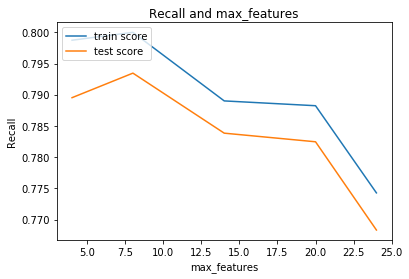

In [127]:
# plotting mean test and train scores with max_features
plt.figure()

plt.plot(cv_results['param_max_features'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_features'], cv_results['mean_test_score'])
plt.xlabel('max_features')
plt.ylabel('Recall')
plt.title("Recall and max_features")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_leaf

In [128]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
rf.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [129]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      19.917074      1.043018         0.123842        0.015229   
1      16.248081      0.063197         0.094606        0.004081   
2      15.419649      0.147688         0.095836        0.007618   
3      14.654603      0.103280         0.089426        0.005573   
4      14.213718      0.421602         0.087805        0.005037   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.799841   
1                    150  {'min_samples_leaf': 150}           0.780196   
2                    200  {'min_samples_leaf': 200}           0.762145   
3                    250  {'min_samples_leaf': 250}           0.747544   
4                    300  {'min_samples_leaf': 300}           0.741704   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.832227           0.822936           0.833245           0.833820   
1           0.812848           0.801964           0.816782           0.814176   
2           0.796921           0.785506           0.804036           0.800637   
3           0.786568           0.767454           0.790228           0.783913   
4           0.775684           0.764269           0.778014           0.775153   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.824414        0.012911                1            0.844893   
1         0.805193        0.013482                2            0.819407   
2         0.789849        0.015192                3            0.803810   
3         0.775142        0.015848                4            0.790934   
4         0.766965        0.013494                5            0.781642   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.839716            0.842835            0.844704   
1            0.817681            0.818610            0.819286   
2            0.799562            0.799230            0.804420   
3            0.787748            0.787814            0.789023   
4            0.773346            0.779784            0.777807   

   split4_train_score  mean_train_score  std_train_score  
0            0.843632          0.843156         0.001875  
1            0.819274          0.818852         0.000649  
2            0.804739          0.802352         0.002434  
3            0.785757          0.788255         0.001700  
4            0.777660          0.778048         0.002766

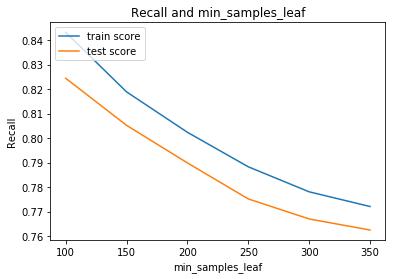

In [130]:
# plotting mean test and train scores with min_samples_leaf
plt.figure()

plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('Recall')
plt.title("Recall and min_samples_leaf")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Random forest with hyperparameters tuning : Tuning min_samples_split

In [131]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", random_state = 100)

# fit random forest on training data
rf = GridSearchCV(estimator = rf, 
                    param_grid = parameters, 
                    cv = n_folds, 
                    return_train_score = True,
                    scoring = "recall")
rf.fit(X_train_pca, y_train_bal)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [132]:
cv_results = pd.DataFrame(rf.cv_results_)
cv_results.sort_values(by = 'rank_test_score', ascending = True).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      24.611615      0.286646         0.141931        0.024825   
1      27.021083      0.166951         0.146223        0.013400   
2      26.518123      0.423253         0.133613        0.007114   
3      25.825547      0.214442         0.131422        0.014971   
4      24.061356      1.816153         0.121610        0.010132   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.826387   
1                     250  {'min_samples_split': 250}           0.804088   
2                     300  {'min_samples_split': 300}           0.795859   
3                     350  {'min_samples_split': 350}           0.784178   
4                     400  {'min_samples_split': 400}           0.783117   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.857181           0.851075           0.854488           0.857446   
1           0.841784           0.827449           0.844132           0.839129   
2           0.832493           0.818954           0.831386           0.827980   
3           0.820812           0.811787           0.827138           0.820016   
4           0.814972           0.803292           0.819437           0.814176   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.849315        0.011692                1            0.880268   
1         0.831316        0.014773                2            0.858831   
2         0.821334        0.013597                3            0.844163   
3         0.812786        0.015113                4            0.835402   
4         0.806999        0.013068                5            0.826508   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.879538            0.882259            0.876825   
1            0.862215            0.860357            0.862025   
2            0.847349            0.843698            0.849217   
3            0.834805            0.836198            0.838731   
4            0.822128            0.821597            0.829440   

   split4_train_score  mean_train_score  std_train_score  
0            0.878343          0.879447         0.001827  
1            0.861286          0.860943         0.001242  
2            0.844561          0.845797         0.002131  
3            0.837725          0.836572         0.001458  
4            0.828964          0.825727         0.003313

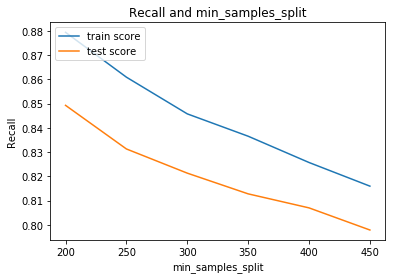

In [133]:
# plotting mean test and train scores with min_samples_split
plt.figure()

plt.plot(cv_results['param_min_samples_split'], cv_results['mean_train_score'])
plt.plot(cv_results['param_min_samples_split'], cv_results['mean_test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('Recall')
plt.title("Recall and min_samples_split")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Fitting the final model with the best parameters obtained from grid search

In [134]:
# model with optimal hyperparameters
rf_final = RandomForestClassifier(bootstrap=True,
                                     max_depth=17,
                                     min_samples_leaf=100, 
                                     min_samples_split=200,
                                     max_features=8,
                                     n_estimators=100,
                                     criterion = "gini", 
                                    random_state = 100)
rf_final.fit(X_train_pca, y_train_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

#### Predictions on the test set

In [135]:
y_test_pred = rf_final.predict(X_test_pca)

#### Metrics Analysis on the test set for Random Forest

In [136]:
ModelMetrics(y_test, y_test_pred)

********* Classification Report *********
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8074
           1       0.25      0.64      0.35       478

    accuracy                           0.87      8552
   macro avg       0.61      0.76      0.64      8552
weighted avg       0.94      0.87      0.90      8552

**** Confusion Matrix ****
[[7140  934]
 [ 174  304]]


Accuracy Score: 0.8704
Sensitivity: 0.636
Specificity: 0.8843
False Positive Rate: 0.1157
Positive Predictive Value: 0.2456
Negative Predictive Value: 0.9762
Precision: 0.2456
Recall: 0.636
F1 Score: 0.3544


#### Plotting the ROC Curve for the Test Dataset

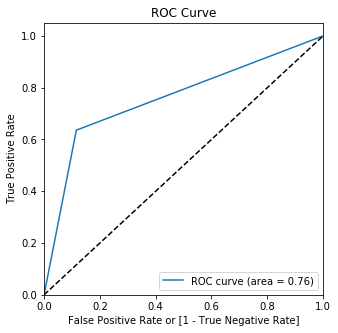

In [137]:
draw_roc(y_test, y_test_pred)

### Building an Interpretable Model using Random Forests

We will build an interpretable model using random forests. This model will give us the list of features sorted by their importance.

In [138]:
rf_model = RandomForestClassifier(bootstrap=True,
                                     max_depth=17,
                                     min_samples_leaf=100, 
                                     min_samples_split=200,
                                     max_features=8,
                                     n_estimators=100,
                                     criterion = "gini", 
                                    random_state = 100)
rf_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [139]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
roam_og_mou_8         0.148188
roam_ic_mou_8         0.104823
loc_ic_t2m_mou_8      0.051867
roam_og_mou_7         0.038081
loc_og_t2m_mou_8      0.037709
max_rech_amt_8        0.036455
fb_user_8             0.034864
loc_ic_t2t_mou_8      0.034165
last_day_rch_amt_8    0.032926
rech_data_amt_8       0.029306
arpu_8                0.028920
total_rech_amt_8      0.027990
recharged_data_8_y    0.025653
max_rech_data_8       0.023894
roam_ic_mou_7         0.017299
loc_og_t2t_mou_8      0.015566
total_rech_num_8      0.015202
count_rech_2g_8       0.014455
offnet_mou_8          0.013494
std_ic_t2t_mou_6      0.011291
std_og_t2t_mou_7      0.011062
std_og_t2t_mou_6      0.009574
vol_3g_mb_8           0.009512
loc_og_t2f_mou_8      0.008750
std_og_t2m_mou_6      0.006876
spl_og_mou_7          0.006779
std_ic_t2t_mou_7      0.006728
aon                   0.005679
vol_2g_mb_8           0.005484
last_day_rch_amt_6    0.005051
loc_og_t2m_mou_7      0.004848
recharged_data_7_y    0.004423
loc_ic_t2f_mou_8      0.004379
sachet_2g_8           0.004365
og_others_6           0.004296
spl_og_mou_6          0.004158
std_ic_t2m_mou_8      0.004114
onnet_mou_8           0.003606
max_rech_data_7       0.003511
std_og_t2m_mou_7      0.003451
last_day_rch_amt_7    0.003199
fb_user_7             0.003144
total_rech_num_7      0.003118
loc_og_t2c_mou_7      0.003035
loc_ic_t2m_mou_7      0.003028
max_rech_amt_7        0.002996
std_og_t2t_mou_8      0.002854
roam_og_mou_6         0.002838
jun_vbc_3g            0.002818
std_ic_t2m_mou_6      0.002727
count_rech_3g_8       0.002711
total_rech_num_6      0.002569
arpu_2g_8             0.002561
loc_ic_t2m_mou_6      0.002550
spl_og_mou_8          0.002488
aug_vbc_3g            0.002465
arpu_3g_8             0.002439
count_rech_2g_7       0.002398
loc_ic_t2f_mou_7      0.002389
onnet_mou_6           0.002365
onnet_mou_7           0.002351
arpu_2g_6             0.002343
arpu_2g_7             0.002333
loc_og_t2m_mou_6      0.002307
isd_ic_mou_6          0.002257
loc_ic_t2f_mou_6      0.002250
std_og_t2m_mou_8      0.002187
vol_3g_mb_7           0.002140
arpu_3g_7             0.002139
loc_og_t2f_mou_7      0.002131
max_rech_amt_6        0.002082
roam_ic_mou_6         0.002049
arpu_7                0.002041
jul_vbc_3g            0.002000
rech_data_amt_7       0.001873
spl_ic_mou_8          0.001804
loc_ic_t2t_mou_7      0.001750
loc_og_t2t_mou_6      0.001723
spl_ic_mou_6          0.001722
loc_og_t2t_mou_7      0.001690
vol_3g_mb_6           0.001658
arpu_3g_6             0.001645
std_ic_t2t_mou_8      0.001613
offnet_mou_6          0.001597
monthly_2g_8          0.001563
std_ic_t2m_mou_7      0.001529
rech_data_amt_6       0.001509
count_rech_3g_6       0.001507
vol_2g_mb_6           0.001466
isd_ic_mou_7          0.001456
sachet_2g_6           0.001448
sachet_3g_7           0.001428
offnet_mou_7          0.001420
recharged_data_6_y    0.001410
total_rech_amt_7      0.001393
max_rech_data_6       0.001353
monthly_3g_8          0.001334
ic_others_6           0.001272
loc_ic_t2t_mou_6      0.001218
count_rech_2g_6       0.001183
arpu_6                0.001166
total_rech_amt_6      0.001061
sachet_2g_7           0.000942
vol_2g_mb_7           0.000907
monthly_2g_7          0.000897
sachet_3g_6           0.000860
loc_og_t2f_mou_6      0.000831
isd_ic_mou_8          0.000828
loc_og_t2c_mou_6      0.000807
count_rech_3g_7       0.000713
ic_others_8           0.000635
ic_others_7           0.000621
std_ic_t2f_mou_8      0.000584
monthly_2g_6          0.000581
fb_user_6             0.000570
loc_og_t2c_mou_8      0.000535
sachet_3g_8           0.000529
isd_og_mou_8          0.000441
isd_og_mou_6          0.000433
std_ic_t2f_mou_6      0.000405
std_ic_t2f_mou_7      0.000402
monthly_3g_7          0.000348
monthly_3g_6          0.000341
isd_og_mou_7          0.000281
std_og_t2f_mou_7      0.000182
spl_ic_mou_7          0.000174
std_og_t2f_mou_8      0.000144
std_og_t2f_mou_6      0.000118
night_pck_user_7     

### Plotting the top 25 features

Here we will plot the top 25 features which we got from our interpretable random forests model.

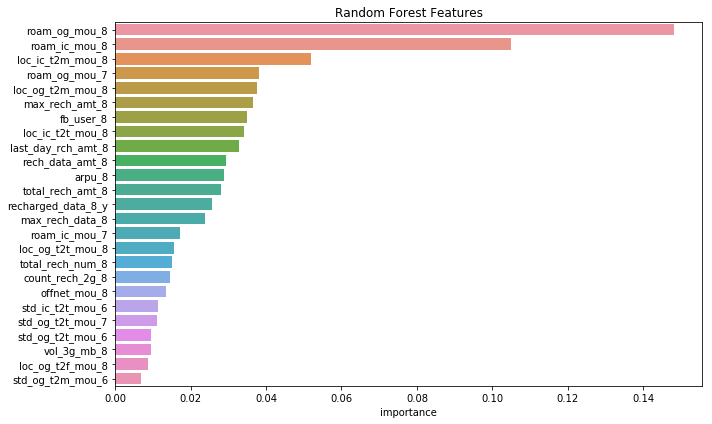

In [140]:
# Plotting the features
plt.figure(figsize=(10, 6))

feature_importances = feature_importances[:25]
sns.barplot(x = "importance",
            y = feature_importances.index,
            data = feature_importances.sort_values(by = "importance", ascending = False))

plt.title('Random Forest Features')
plt.tight_layout()
plt.show()

From the graph above where the top 25 features are ranked in order of importance, we can conclude that the top main predictiors of churn are mostly the features pertaining to the 'action' phase (August) and to a lesser extent the features pertaining to the 'good' phase (June and July).

This suggests that to a large extent, the action phase has a strong impact on the customer churn of high value customers. These predictors which have an high impact on customer churn are listed as follows:

1. roam_og_mou_8 - 	Minutes of usage of roaming outgoing calls for the month of August
2. roam_ic_mou_8 -	Minutes of usage of roaming incoming calls for the month of August
3. loc_ic_t2m_mou_8 - Minutes of usage of local incoming calls from Operator T to other operator mobile for the month of August
4. roam_og_mou_7 -	Minutes of usage of roaming outgoing calls for the month of July
5. loc_og_t2m_mou_8 - Minutes of usage of local outgoing calls from Operator T to other operator mobile for the month of August
6. max_rech_amt_8 -	Maximum of Recharge amount in local currency for the month of August
7. fb_user_8 -	Service scheme to avail services of Facebook and similar social networking sites for the month of August
8. loc_ic_t2t_mou_8 -	Minutes of usage of local incoming calls from mobile to mobile within same operator for the month of August
9. last_day_rch_amt_8 -	The last recharge amount in local currency for the month of August
10. rech_data_amt_8 -	Recharge amount in local currency for the month of August
11. arpu_8 -	Average revenue per user for the month of August
12. total_rech_amt_8 -	Total recharge amount in local currency for the month of August
13. recharged_data_8_y -	Flag indicating that the user has recharged for mobile internet services for the month of August
14. max_rech_data_8 -	Maximum of Mobile Internet recharged for the month of August
15. roam_ic_mou_7 -	Minutes of usage of roaming incoming calls for the month of July
16. loc_og_t2t_mou_8 -	Minutes of usage of local outgoing calls from mobile to mobile within same operator for the month of August
17. total_rech_num_8 -	Total number of times the user recharged for the month of August
18. count_rech_2g_8 -	Count of recharges of 2G network service for the month of August
19. offnet_mou_8 -	Minutes of usage of all calls outside the operator T network for the month of August
20. std_ic_t2t_mou_6 -	Minutes of usage of STD incoming calls from mobile to mobile within same operator for the month of June
21. std_og_t2t_mou_7 -	Minutes of usage of STD outgoing calls from mobile to mobile within same operator for the month of July
22. std_og_t2t_mou_6 -	Minutes of usage of STD outgoing calls from mobile to mobile within same operator for the month of June
23. vol_3g_mb_8	Mobile - 3G internet usage volume (in MB) for the month of August
24. loc_og_t2f_mou_8 -	Minutes of usage of local outgoing calls from Operator T to fixed lines of T for the month of August
25. std_og_t2m_mou_6 -	Minutes of usage of STD outgoing calls from Operator T to other operator mobile for the month of June


## Conclusion

The purpose of the telecom churn case study was to predict the customer churn behavior. The intention was to analyse the behaviour of the cutomer over the good phase and the action phase. To this end, we created 3 predictive models as mentioned below:

1. Logistic Regression Model
2. Decision Tree Classifier
3. Random Forest Classifier

We first created the above models with default parameters. Then we hypertuned each model and recreated them with the best estimators, which showed an increase in the various score metrics as shown in the tables below.

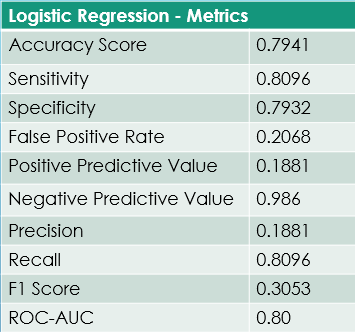

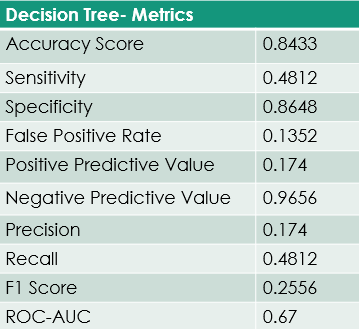

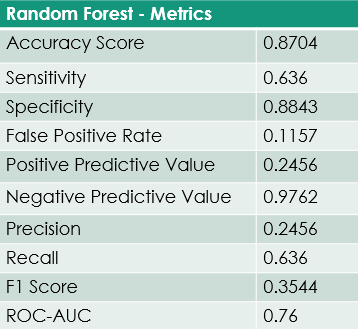

Out of all the above models, the Logisitic Regression Model with probability cut-off of 0.48 gave us the best score metrics in terms of sensitivity. It was able to achieve a good sensitivity of around 81% for test data. 

The accuracy of the logisitic regression model is lower than that of the decision tree and random forest models. But since our business requirement is to achieve a high sensitivity, we will go by the model with the highest sensitivity which is the <b> Logisitic Regression model </b>.

## Recommendations

For the telcom churn problem, the most important business metric is the sensitivity which measures the proportion of actual churners that are correctly identified. Here we want to identify most customers at risk of churning, even if some customers are misclassified as churn. The losses the company incurs in the event of a churn is much higher than having a few false positives. Hence we will have to keep a close watch on the sensitivity achieved by the model.

Also, looking at the top predictors of churn, we can see that the minutes of usage of a customer for roaming (both incoming and outgoing) are very strong indicators of churn. Hence these parameters warrant a close monitoring by the telecom company with the intention that in the event of a drop in MoU, the telecom company can work towards actively targeting these customers with attractive marketing campaigns.